In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

In [6]:
df = pd.read_csv('../data/data_hackathon_v04.csv', sep = '|')

In [7]:
df.describe()

,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb
count,1.117300e+06,1.117300e+06,1.117300e+06,1.117300e+06,1.117300e+06,1.117300e+06,1.117300e+06,1.117300e+06
mean,4.983112e+01,2.402001e+01,4.983002e+01,2.401991e+01,5.871279e+00,8.382887e-02,1.943077e-03,1.386109e-02
std,5.702757e-02,5.826447e-02,8.369601e-02,9.303433e-02,3.169049e+00,2.771311e-01,4.403752e-02,1.169144e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.981681e+01,2.400094e+01,4.981537e+01,2.399671e+01,3.690000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.983540e+01,2.402350e+01,4.983297e+01,2.402012e+01,5.350000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.984317e+01,2.403638e+01,4.984314e+01,2.404011e+01,7.370000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.068639e+01,3.085228e+01,5.068639e+01,3.085261e+01,1.001600e+02,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
df.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043000000,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580000000,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537000000,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357000000,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377000000,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0


In [9]:
df_new = df.copy()
df_new['created_at'] = pd.to_datetime(df['created_at'], format= '%Y/%m/%d')
zero_coords_mask = (df.pickup_lat != 0).values * (df.pickup_lng != 0).values * (df.dropoff_lat != 0).values * (df.dropoff_lng != 0).values
df_new = df_new[zero_coords_mask]
df_new.shape

(1117297, 12)

In [10]:
df_new.to_csv('data_cleaned.csv')

In [11]:
import pandas_profiling

In [12]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="output.html")

/home/paperspace/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/paperspace/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/paperspace/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/paperspace/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/pa

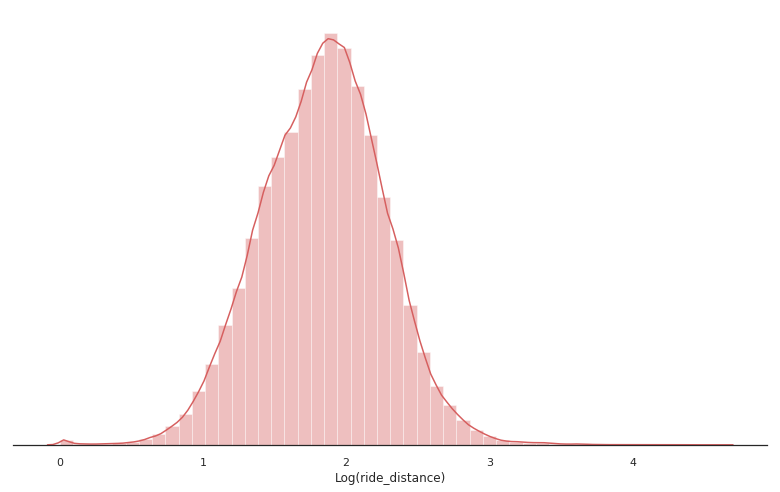

In [13]:
%matplotlib inline
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(df_new['ride_distance'].values+1), axlabel = 'Log(ride_distance)', label = 'log(ride_distance)', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

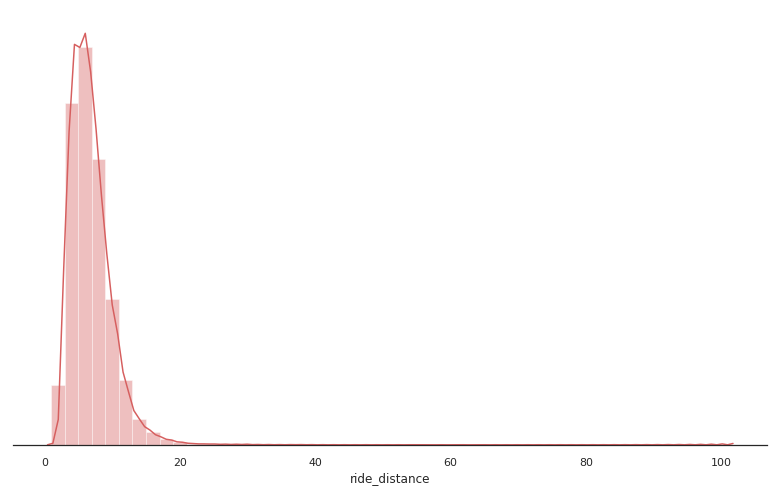

In [14]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(df_new['ride_distance'].values+1, axlabel = 'ride_distance', label = 'ride_distance', bins = 50, color="r")
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

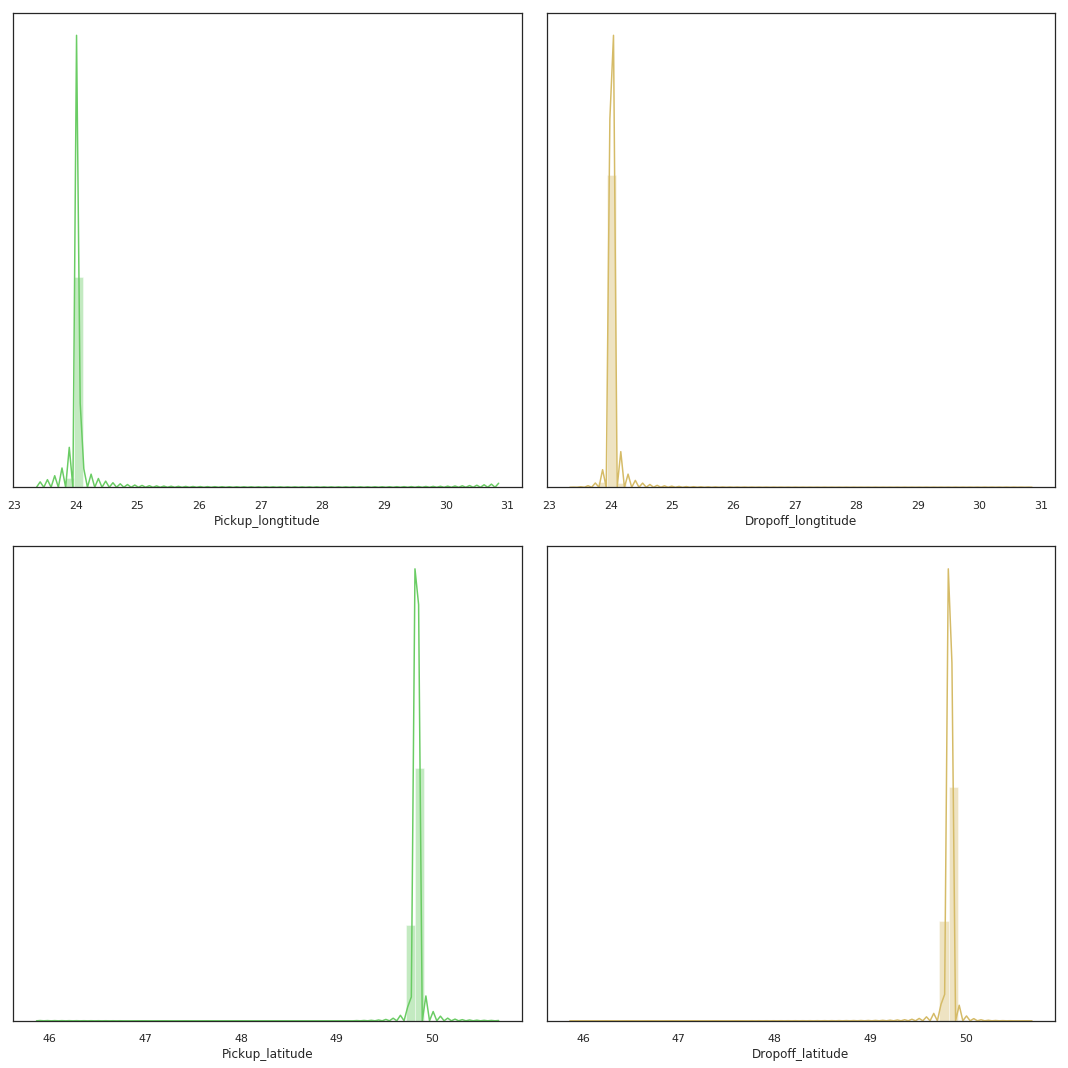

In [15]:
f, axes = plt.subplots(2, 2, figsize = (15, 15))
sns.distplot(df_new['pickup_lng'].values, axlabel = 'Pickup_longtitude', color = 'g', ax = axes[0, 0])
sns.distplot(df_new['dropoff_lng'].values, axlabel = 'Dropoff_longtitude', color = 'y', ax = axes[0, 1])
sns.distplot(df_new['pickup_lat'].values, axlabel = 'Pickup_latitude', color = 'g', ax = axes[1, 0])
sns.distplot(df_new['dropoff_lat'].values, axlabel = 'Dropoff_latitude', color = 'y', ax = axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

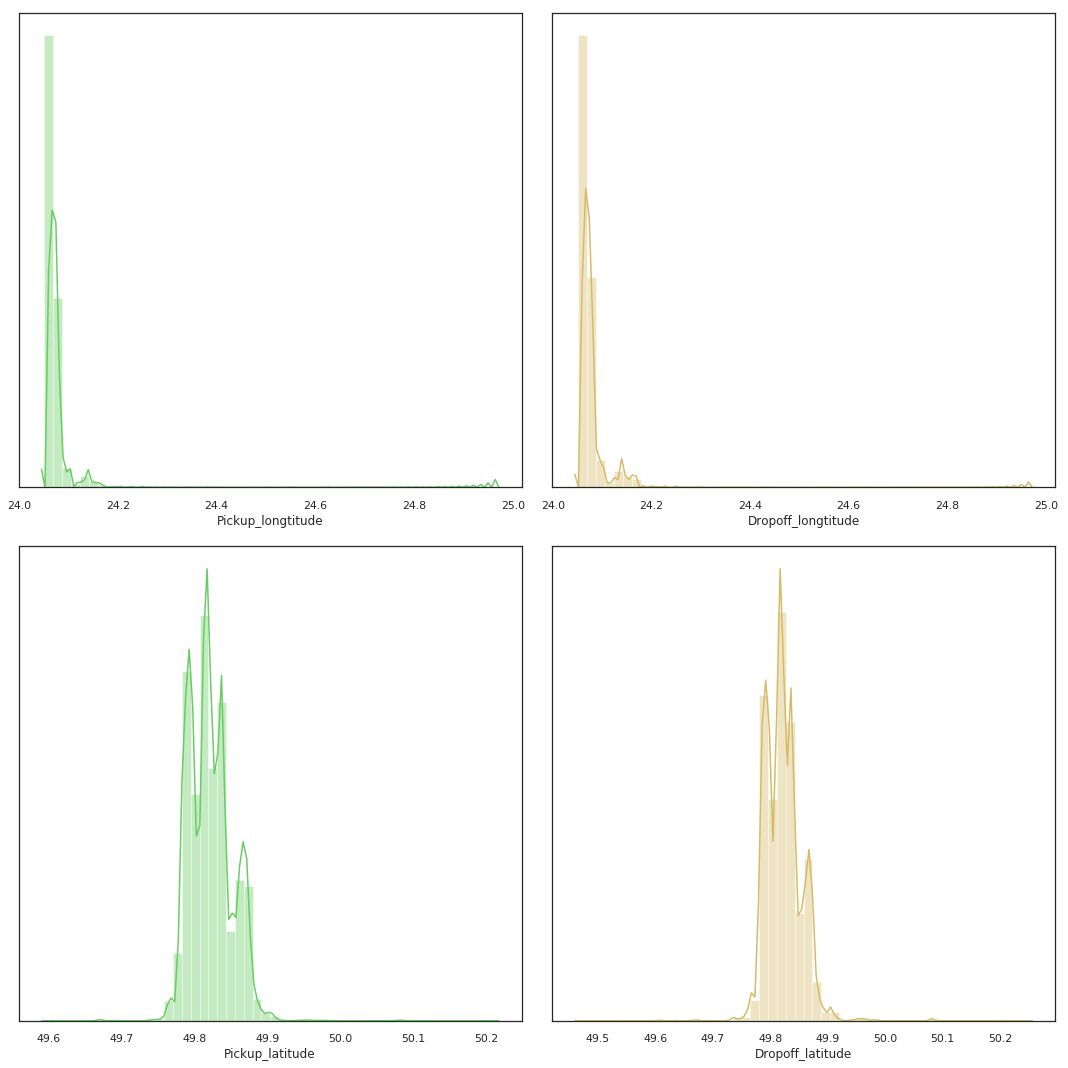

In [16]:
df = df_new.loc[(df_new.pickup_lat > 48.6) & (df_new.pickup_lat < 51.0)]
df = df.loc[(df.dropoff_lat>48.6) & (df.dropoff_lat < 52.9)]
df = df.loc[(df.dropoff_lng > 24.05) & (df.dropoff_lng < 25)]
df = df.loc[(df.pickup_lng > 24.05) & (df.pickup_lng < 25)]

f, axes = plt.subplots(2, 2, figsize = (15, 15))
sns.distplot(df['pickup_lng'].values, axlabel = 'Pickup_longtitude', color = 'g', ax = axes[0, 0])
sns.distplot(df['dropoff_lng'].values, axlabel = 'Dropoff_longtitude', color = 'y', ax = axes[0, 1])
sns.distplot(df['pickup_lat'].values, axlabel = 'Pickup_latitude', color = 'g', ax = axes[1, 0])
sns.distplot(df['dropoff_lat'].values, axlabel = 'Dropoff_latitude', color = 'y', ax = axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [ ]:
#CLUSTERING

In [17]:
from sklearn.cluster import KMeans

In [20]:
centroid_pickups.head()

,centroid_pick_long,centroid_pick_lat,label_pick
0,24.011198,49.827381,0
1,30.848747,45.885182,1
2,24.057110,49.866388,2
3,24.060881,49.791840,3
4,24.037536,49.836095,4


In [21]:
df_new.shape

(1117297, 14)

In [22]:
df_cl.shape
zones = np.array(df_cl['label_pick'])
zones.shape

(1117297,)

In [23]:
df_new['zone'] = pd.Series(zones)
df_new.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb,label_pick,label_drop,zone
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0,0,3,0.0
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0,7,5,7.0
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0,10,7,10.0
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0,4,18,4.0
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0,4,10,4.0


In [24]:
df_new.to_csv('data_with_zones.csv')

In [25]:
map_1 = folium.Map(location=[49.82, 24.013], zoom_start=15,tiles='Stamen Toner')
map_1

In [26]:
df_new.pickup_lat[0]

49.82467065

In [27]:
map_1 = folium.Map(location=[49.82, 24.013], zoom_start=10,tiles='Stamen Toner')
for i in range(df_new.shape[0]):
    if i % 10000 ==0:
        folium.Marker([df_new.pickup_lat[i], df_new.pickup_lng[i]]).add_to(map_1)
        
map_1

In [28]:
centres = pd.read_csv('../data/df_cluster_cenroids.csv', sep = ',')

In [29]:
centres.head(30)

,0,1
0,49.814901,24.146221
1,49.851628,24.024771
2,49.824965,23.976075
3,49.813051,24.071293
4,49.779510,24.014948
5,49.866618,24.054245
6,49.841891,23.994499
7,49.821962,23.909086
8,49.823693,24.030941
9,49.805428,24.044771


In [30]:
map_1 = folium.Map(location=[49.82, 24.013], zoom_start=10,tiles='OpenStreetMap')
for i in range(centres.shape[0]):
    folium.Marker([centres['0'][i], centres['1'][i]]).add_to(map_1)
    folium.CircleMarker(location=[centres['0'][i], centres['1'][i]], radius=50,
                    color='#F08080',
                    fill_color='#3186cc').add_to(map_1)
map_1